In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # para leer datos
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from sklearn.utils.multiclass import unique_labels

In [2]:
# Carga datos
data = pd.read_csv( 'data_Sha_64.txt' , delimiter=',' )
#data.head()

In [3]:
data.keys()
X = data[data.keys()[1:]] # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = data[data.keys()[0]]
print(np.shape(X), np.shape(Y))

(1599, 64) (1599,)


In [4]:
species = np.array(Y.copy())
species = np.unique(species)

target = []
for i in range(len(Y)):
    for j in range(len(species)):
        if Y[i] == species[j]:
            target.append( j )

In [5]:
# Vamos a hacer un split training test
scaler = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split( X, target, train_size=0.5 )

In [6]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
C_array = np.logspace(-3, 3, 13)

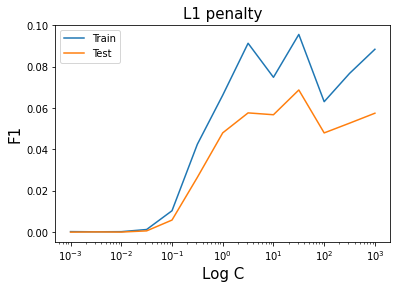

In [8]:
sparsity_array = []
f1_array = []
f1_test_array = []

for c in C_array:
    # Turn up tolerance for faster convergence
    clf = LogisticRegression( C=c, penalty='l1', solver='saga', tol=0.1 )
    clf.fit(X_train, Y_train)
    sparsity_array.append( np.mean(clf.coef_ == 0) * 100 )
    f1_array.append( sklearn.metrics.f1_score(Y_train, clf.predict(X_train), average='macro') )
    f1_test_array.append( sklearn.metrics.f1_score(Y_test, clf.predict(X_test), average='macro') )
    
plt.plot( C_array, f1_array , label= 'Train' )
plt.plot( C_array, f1_test_array , label= 'Test' )
plt.title('L1 penalty', fontsize=15)
plt.ylabel("F1" ,fontsize=15 )
plt.xlabel( 'Log C' ,fontsize=15 )
plt.xscale( "log" )
plt.legend( )
plt.show()

In [9]:
C_best = 5
# Turn up tolerance for faster convergence
clf = LogisticRegression( C=C_best, penalty='l1', solver='saga', tol=0.1 )
clf.fit(X_train, Y_train)
sparsity_array.append( np.mean(clf.coef_ == 0) * 100 )

print('F1', sklearn.metrics.f1_score(Y_train, clf.predict(X_train), average='macro') )
# sklearn.metrics.plot_confusion_matrix(clf, X_test, Y_test)

F1 0.08974160887843122


(100, 64)


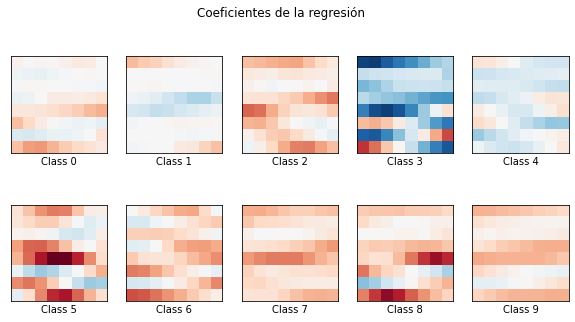

In [10]:
coef = clf.coef_.copy()
print(np.shape(coef))

plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(8, 8), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Coeficientes de la regresión')
plt.show()

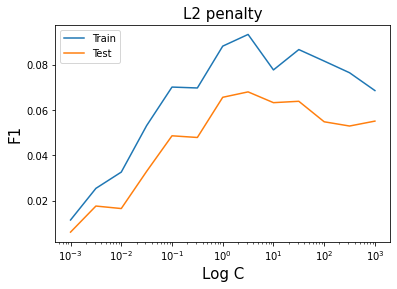

In [11]:
sparsity_array = []
f1_array = []
f1_test_array = []

for c in C_array:
    # Turn up tolerance for faster convergence
    clf = LogisticRegression( C=c, penalty='l2', solver='saga', tol=0.1 )
    clf.fit(X_train, Y_train)
    sparsity_array.append( np.mean(clf.coef_ == 0) * 100 )
    f1_array.append( sklearn.metrics.f1_score(Y_train, clf.predict(X_train), average='macro') )
    f1_test_array.append( sklearn.metrics.f1_score(Y_test, clf.predict(X_test), average='macro') )
    
plt.plot( C_array, f1_array , label= 'Train' )
plt.plot( C_array, f1_test_array , label= 'Test' )
plt.title('L2 penalty', fontsize=15)
plt.ylabel("F1" ,fontsize=15 )
plt.xlabel( 'Log C' ,fontsize=15 )
plt.xscale( "log" )
plt.legend( )
plt.show()

In [12]:
C_best = 0.5
# Turn up tolerance for faster convergence
clf = LogisticRegression( C=C_best, penalty='l2', solver='saga', tol=0.1 )
clf.fit(X_train, Y_train)
sparsity_array.append( np.mean(clf.coef_ == 0) * 100 )

print('F1', sklearn.metrics.f1_score(Y_train, clf.predict(X_train), average='macro') )
# sklearn.metrics.plot_confusion_matrix(clf, X_test, Y_test)

F1 0.0774438983008408


(100, 64)


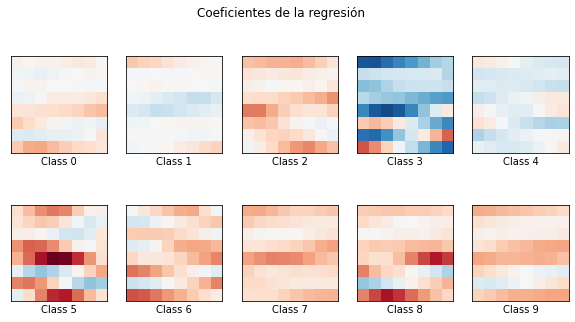

In [13]:
coef = clf.coef_.copy()
print(np.shape(coef))

plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(8, 8), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Coeficientes de la regresión')
plt.show()